<a href="https://colab.research.google.com/github/geraldkembellec/ScientificCommitteeAnalytics/blob/master/Adressbuch_nobles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ------------------------------------------------------------
# This notebook is coded in Python 3
# - To display results, it uses 
#     + markdown (md)
#     + and HTML 5 languages
# - To query DBpedia
#     + SPARQL is used
# ------------------------------------------------------------
# Here all that we will need to run the Python Notebook:
# load the pandas library : to play with tables & figures
import pandas as pd
# semantic communication with dbpedia
# the query langage is SPARQL, we have to install it with pip
# (pip = packages installer for python)
%pip install SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON
# to easily display results 
from IPython.core.display import HTML
from IPython.display import Image
# to fix misencoded URL
import urllib.parse
# to draw lovely charts
from matplotlib import pyplot as plt

     |████████████████████████████████| 376 kB 4.4 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 


In [ ]:
# url = 'http://geraldkembellec.scienceontheweb.net/Deutsche_Noblen_in_Paris_im_Jahr_1854-2.csv'
url = 'http://geraldkembellec.scienceontheweb.net/maj_adressbuch_nobles.csv'
# load a CSV file dataframe
# load a CSV file dataframe
# values separated by "," sign
# data is the name of the dataframe
data = pd.read_csv(url,sep = ';')
# enumerate loaded columns
columns_number=data.shape[1]
# count numbers of nobles
noble_number=data.shape[0]
print("In the 1854 Adressbuch dataset we found",noble_number,"german nobles in Paris")
print("here you can see a sample of the dataset :")
data

In the 1854 Adressbuch dataset we found 116 german nobles in Paris
here you can see a sample of the dataset :


,id,surname,first_name,gender,title,profession_verbatim,occupation_group,legion_d_honneur,status,military_status,houseno,houseno_specification,name_old_verbatim,name_new,geo_long,geo_lat,post1860,post18602,post18603,pre1860,pre18602,pre18603,pre18604,pre18605
0,587.0,Mackau von,G.,M,Baron,"Admiral, Senator",Militär,Chevalier,Active,Military,7.0,NaN,De Caumartin,Rue De Caumartin,2.32824,48.8725,9.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN
1,717.0,Schramm,G.,M,Graf,"Divisionsgeneral, Senator",Militär,Chevalier,Active,Military,77.0,NaN,Louis Le Grand,Rue Louis-le-grand,2.33258,48.8688,2.0,NaN,NaN,2.0,3.0,5.0,NaN,NaN
2,97.0,Hamel von,NaN,M,Graf,NaN,Adel,NaN,Active,Civil,89.0,NaN,De Grenelle,Rue De Lourmel,2.28751,48.8451,15.0,NaN,NaN,10.0,11.0,communes annexées,NaN,NaN
3,287.0,Adelswaerd,G.,M,Baron von,Secretär der schwedischen Gesandtschaft,Beamte,NaN,Active,Civil,8.0,NaN,De Rumfort,Boulevard Malesherbes,2.31387,48.8798,8.0,17.0,NaN,1.0,communes annexées,NaN,NaN,NaN
4,295.0,Allemans,NaN,M,Baron von,NaN,Adel,NaN,Active,Civil,153.0,NaN,Du Faubourg Saint Honoré,Rue Du Faubourg-saint-honoré,2.31839,48.8699,8.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,4108.0,Kronowska,NaN,F,Gräfin v Tabaß,NaN,Adel,NaN,Active,Civil,44.0,NaN,Basse Du Rempart,NaN,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,3808.0,Terlecki,NaN,M,Abbe,"Doctor der Medecin u. Theologie, Vorsteher der...",Selbständig,no_rank,Active,Civil,69.0,NaN,De Babylone,Rue De Babylone,2.32128,48.8517,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
113,3874.0,Goschler,NaN,M,Abbe,Director des Collegiums Stanislaus,Selbständig,no_rank,Active,Civil,22.0,NaN,Notre Dame Des Champs,Rue Notre-dame-des-champs,Sun Feb 01 00:00:00 CET 3311,48.8436,6.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN
114,3914.0,Jager,NaN,M,Abbe,Professor der Theologie,Selbständig,no_rank,Active,Civil,66.0,NaN,Du Cherche Midi,Rue Du Cherche-midi,2.32358,48.8479,6.0,15.0,NaN,11.0,10.0,communes annexées,NaN,NaN


## What I have to say dealing with the " Légion d'honneur " ?
From the beginning (1802), the Legion of Honor was aimed at __both civilians and soldiers alike__. Napoleon is also credited with the famous sentence :
> "I want to decorate my soldiers and my scientists".

---

<img 
width="128" alt="Croix de la Legion d&#039;Honneur" 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Croix_de_la_Legion_d%27Honneur.svg/128px-Croix_de_la_Legion_d%27Honneur.svg.png">

--- 

<div itemscope itemtype="https://schema.org/DefinedTerm">
<link 
itemprop="url" 
href="http://dbpedia.org/resource/Legion_of_Honour"/>
 Name: <span itemprop="name">Legion of Honour</span><br/>
 Description: <span itemprop="description">The Legion of Honour is the highest French order of merit, both military and civil. Established in 1802 by Napoleon Bonaparte, it has been retained by all later French governments and régimes. The order's motto is Honneur et Patrie ("Honour and Fatherland"), and its seat is the Palais de la Légion d'Honneur next to the Musée d'Orsay, on the left bank of the Seine in Paris. The order is divided into five degrees of increasing distinction: Chevalier (Knight), Officier (Officer), Commandeur (Commander), Grand officier (Grand Officer), and Grand-croix (Grand Cross).</span><br/>
 <link itemprop="inDefinedTermSet" href="http://dbpedia.org/">
</div>

<!-- Here a documented microdata definition linked to dbpedia -->
<div itemscope itemtype="https://schema.org/DefinedTerm">
<link itemprop="url" href="http://dbpedia.org/resource/Legion_of_Honour"/>
<h3>Name: <dfn itemprop="name" id="lgh-definition">Legion of Honour</dfn></h3>
<p itemprop="description">
The Legion of Honour is the highest French order of merit, both military and civil. Established in 1802 by Napoleon Bonaparte, it has been retained by all later French governments and régimes. The order's motto is Honneur et Patrie ("Honour and Fatherland"), and its seat is the Palais de la Légion d'Honneur next to the Musée d'Orsay, on the left bank of the Seine in Paris. The order is divided into five degrees of increasing distinction: Chevalier (Knight), Officier (Officer), Commandeur (Commander), Grand officier (Grand Officer), and Grand-croix (Grand Cross).
</p>
<link itemprop="inDefinedTermSet" href="http://dbpedia.org/">
</div>

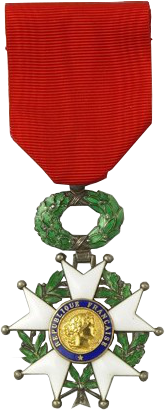

In [ ]:
# Specify the DBPedia endpoint
sparql = SPARQLWrapper("http://dbpedia.org/sparql")

# Query for the description of "Legion_of_Honour", filtered by language 
sparql.setQuery("""
PREFIX dbpedia-owl: <http://dbpedia.org/ontology/>              
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>                
SELECT ?label ?comment ?thumbnail
WHERE {                                
  <http://dbpedia.org/resource/Legion_of_Honour> rdfs:label ?label .                
  <http://dbpedia.org/resource/Legion_of_Honour> rdfs:comment ?comment .                               
  <http://dbpedia.org/resource/Legion_of_Honour> dbpedia-owl:thumbnail ?thumbnail .   
FILTER (LANG(?label)='en' AND LANG(?comment)='en')                              
}  
""")

# Convert results to JSON format
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

for hit in result["results"]["bindings"]:
  abstract=hit["comment"]["value"]
  pic=hit["thumbnail"]["value"]
  title=hit["label"]["value"]
  
  # We use microdata to inject some semantic content 
  # here a definition from dpepia
  display(HTML('<div itemscope itemtype="https://schema.org/DefinedTerm">'))
  display(HTML('<h2>What DBpedia has to say about "<dfn itemprop="name">'+title+'</dfn> " : </h2>'))
  display(HTML('<link itemprop="url" href="http://dbpedia.org/resource/Legion_of_Honour"/>'))
  display(HTML('<p>'))
  display(HTML(abstract))
  display(HTML('</p></div>'))

pic_path='http://commons.wikimedia.org/wiki/Special:FilePath/'
image_file_name=pic.replace('http://commons.wikimedia.org/wiki/Special:FilePath/','')
image_file_name=image_file_name.replace('?width=300','')
#print(image_file_name)
encoded_pic_name = urllib.parse.quote(image_file_name)
#print(pic_path+encoded_pic_name)
display(Image(pic_path+encoded_pic_name))

In [ ]:

#print(data.loc[(data['Beruf_Kategorie']==job),:])
number_chevaliers=data.value_counts(data['legion_d_honneur']=="Chevalier")
number_officiers=data.value_counts(data['legion_d_honneur']=="Officier")
number_grand_officiers=data.value_counts(data['legion_d_honneur']=="Grand Officier")
number_grand_croix=data.value_counts(data['legion_d_honneur']=="Grand-Croix")
print("In the dataset of noble German in Paris in 1854, dealing with 'la Légion d'honneur':")
print("-",number_chevaliers.values[1],"had the 'chevalier' grade")
print("-",number_officiers.values[1],"had the 'officier' grade")
print("-",number_grand_officiers.values[1],"had 'grand officier' grade") 
print("- and none had 'Commander' or 'Grand-Croix' grade")

In the dataset of noble German in Paris in 1854, dealing with 'la Légion d'honneur':
- 13 had the 'chevalier' grade
- 2 had the 'officier' grade
- 1 had 'grand officier' grade
- and none had 'Commander' or 'Grand-Croix' grade


In [ ]:
# i is a counter for nobles with "Légion d'honneur"
# and j is a counter for nobles without "Légion d'honneur"
i=0
j=0
ldh_noble = []
decorations = []
# Include a nice HTML subtitle
display(HTML('<h2>List of german nobles with "Légion d\'honneur" </h2>'))
for myindex, ligne in data.iterrows():
  # move "von" before the familly name
  chaine = ligne["surname"]
  chaine2=chaine.replace(" von", "")
  familly_name="von "+chaine2
  taille_legion=len(str(ligne["legion_d_honneur"]))
  if taille_legion > 3:
    i=i+1
    taille_firstname = len(str(ligne["first_name"]))
    decorations.append(ligne["legion_d_honneur"])
    # 3 is the size for NaN type 
    if taille_firstname == 3:
      print(ligne["title"]+" "+familly_name+", "+ligne["military_status"]+", "+ligne["legion_d_honneur"])
      current = { "id":ligne["id"],"first_name=":"Unknown","legion_grade":ligne["legion_d_honneur"]}
    else:
      print(ligne["title"]+" "+familly_name+", "+ligne["first_name"]+", "+ligne["military_status"]+", "+ligne["legion_d_honneur"])
      current = { "id":ligne["id"],"first_name=":ligne["first_name"],"legion_grade":ligne["legion_d_honneur"]}
  else:
    # if people has no lgh
    j=j+1
  ldh_noble.append(current)
#print(ldh_noble)
#print(decorations)
nb_lgh=i
nb_without_lgh=j
print("There were",nb_lgh,"nobles with 'Légion d'honneur' on the population of",noble_number)

Baron von Mackau, G., Military, Chevalier
Graf von Schramm, G., Military, Chevalier
Baron von von Billing, C., Civil, Chevalier
Graf von Fezensac, Civil, Chevalier
Graf von Lövenhielm, G. O., Civil, Chevalier
Baron von Wolbock, Civil, Chevalier
Herzog von Elchingen, O., Civil, Chevalier
Baron von Rothschild, Salomon, Civil, Grand Officier
Graf von Tascher, O., Civil, Chevalier
Baron von Rothschild, Joh. G.O., Civil, Chevalier
Baron von Langsdorff, O., Civil, Chevalier
Graf und Gräfin von Nieuwerkerke, Civil, Officier
Baron von Heeckeren, Civil, Chevalier
General Graf von Ordener, G. O., Civil, Chevalier
Graf von Nieuwerkerke, Civil, Officier
Abbe von Terlecki, Civil, no_rank
Abbe von Goschler, Civil, no_rank
Abbe von Jager, Civil, no_rank
Graf Miglied des Institus von Pradel Von, O., Civil, Chevalier
There were 19 nobles with 'Légion d'honneur' on the population of 116


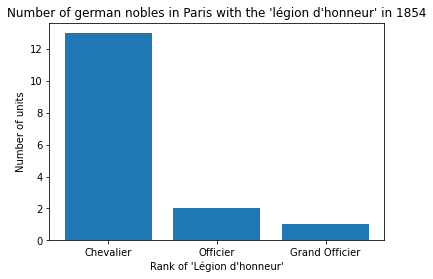

In [ ]:
decorations_list_ldh = ['Chevalier','Officier','Grand Officier']
decorations_count_ldh = [decorations.count('Chevalier'),decorations.count('Officier'),decorations.count('Grand Officier')]
plt.bar(decorations_list_ldh,decorations_count_ldh)
plt.title("Number of german nobles in Paris with the 'légion d'honneur' in 1854")
plt.xlabel("Rank of 'Légion d'honneur'")
plt.ylabel("Number of units")
plt.show()

In [ ]:
percent_of_nobles_with_lgh = nb_lgh / noble_number * 100 
print(str(round(percent_of_nobles_with_lgh)) + "% of noble Germans in Paris in 1854 received one of the 'Légion d'honneur' distinction")

16% of noble Germans in Paris in 1854 received one of the 'Légion d'honneur' distinction


In [ ]:
# Not the best code ever
soldier_status=data.value_counts(data['occupation_group']=="Militär")
noble_status=data.value_counts(data['occupation_group']=="Adel")
functionary_status=data.value_counts(data['occupation_group']=="Beamte")
self_employed_status=data.value_counts(data['occupation_group']=="Selbständig")
craftsmen_status=data.value_counts(data['occupation_group']=="Handwerk")
merchants_status=data.value_counts(data['occupation_group']=="Handel")
retired_status=data.value_counts(data['occupation_group']=="Rentner")
annuitant_status=data.value_counts(data['occupation_group']=="Rentier")
print("Most of nobles's activities are not clearly defined : "+ str(noble_status[True])+" are described with the 'Adel' term, which is quite fuzzy.")
print("The 1st category of occupation by ranking is 'functionaries' with a value of "+str(functionary_status[True])+" persons.")
# not significant :
#print(soldier_status[True])
#print(self_employed_status[True])
#print(craftsmen_status[True])
#print(merchants_status[True])
#print(retired_status[True])
#print(annuitant_status[True])

Most of nobles's activities are not clearly defined : 89 are described with the 'Adel' term, which is quite fuzzy.
The 1st category of occupation by ranking is 'functionaries' with a value of 15 persons.


In [ ]:
occupation_nobles = []
for i,ligne in data.iterrows():
  current_occupation = ligne["occupation_group"]
  occupation_nobles.append(current_occupation)
#print(occupation_nobles)

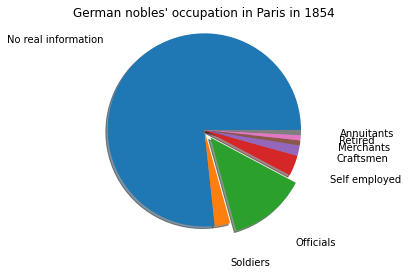

In [ ]:
occupation_list_nobles_status = ['No real information',
                                 'Soldiers',
                                 'Officials',
                                 'Self employed',
                                 'Craftsmen',
                                 'Merchants',
                                 'Retired',
                                 'Annuitants'
                                 ]
occupation_count_list = [occupation_nobles.count('Adel'),
                         occupation_nobles.count('Militär'),
                         occupation_nobles.count('Beamte'),
                         occupation_nobles.count('Selbständig'),
                         occupation_nobles.count('Handwerk'),
                         occupation_nobles.count('Handel'),
                         occupation_nobles.count('Rentner'),
                         occupation_nobles.count('Rentier')
                         ]
labels = occupation_list_nobles_status
sizes = occupation_count_list
explode = (0, 0, 0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice:'officials' 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, labeldistance = 1.4)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("German nobles' occupation in Paris in 1854")
plt.show()

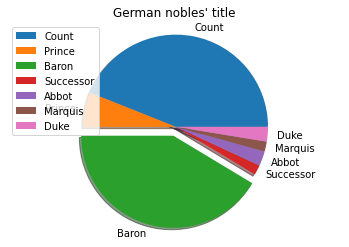

In [ ]:
title_nobles = []
for i,ligne in data.iterrows():
  current_title = ligne['title']
  if 'Graf' in current_title:
    title_nobles.append('Graf or Gräfin')
    #print('Graf or Gräfin')
  elif ('Gräfin' in current_title):
    title_nobles.append('Graf or Gräfin')
  elif 'Prinz' in current_title:
    title_nobles.append('Prinz or Prinzessin')
    #print('Prinz or Prinzessin')
  elif 'Baron' in current_title:
    title_nobles.append('Baron or Baronnin')
    #print('Baron or Baronnin')
  elif 'Nachfolger' in current_title:
    #print('Successor')
    title_nobles.append('Successor')
  elif 'Abbe' in current_title:
    #print('Abbe')
    title_nobles.append('Abbe')
  elif 'Marquis' in current_title:
    #print('Marquis or Marquise')
    title_nobles.append('Marquis or Marquise')
  elif 'Herzog' in current_title:
    #print("Herzog or Herzogin")
    title_nobles.append('Herzog or Herzogin')
  else:
    title_nobles.append(current_title)
    print("hum : "+current_title)
#print(title_nobles)
nobles_status=['Count',
               'Prince',
               'Baron',
               'Successor',
               'Abbot',
               'Marquis',
               'Duke'
              ]
nobles_status_list = [
                      title_nobles.count('Graf or Gräfin'),
                      title_nobles.count('Prinz or Prinzessin'),
                      title_nobles.count('Baron or Baronnin'),
                      title_nobles.count('Successor'),
                      title_nobles.count('Abbe'),
                      title_nobles.count('Marquis or Marquise'),
                      title_nobles.count('Herzog or Herzogin'),
                      ]
#print(nobles_status_list)
labels = nobles_status
sizes = nobles_status_list
fig1, ax1 = plt.subplots()
explode = (0, 0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice 
ax1.pie(sizes, explode=explode,labels=labels,shadow=True, labeldistance = 1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("German nobles' title")
plt.legend()
plt.show()

In [ ]:
import folium
paris = folium.Map(location = [48.866051,2.3565218], zoom_start = 15)

folium.Marker([48.866051,2.3565218], popup = "DHI").add_to(paris)
folium.Marker([48.8679373,2.3375114,], popup = "DFK").add_to(paris)
paris


In [ ]:
itr = next(data.iterrows())[1]["geo_long"]
itr

'2.32824'



```
<!-- In HTML5 with COinS (Niso-Z39-88) for bibliography exposal to Zotero -->
```

<h3>Bibliography</h3>
<div class="csl-bib-body" style="line-height: 2; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">König, M. (Ed.). (2003). <i>Deutsche Handwerker, Arbeiter und Dienstmädchen in Paris: Eine vergessene Migration im 19. Jahrhundert</i>. Oldenbourg Verlag. <a href="https://doi.org/10.1524/9783486834383">https://doi.org/10.1524/9783486834383</a></div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=urn%3Aisbn%3A978-3-486-56761-8&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=Deutsche%20Handwerker%2C%20Arbeiter%20und%20Dienstm%C3%A4dchen%20in%20Paris%3A%20eine%20vergessene%20Migration%20im%2019.%20Jahrhundert&amp;rft.publisher=Oldenbourg%20Verlag&amp;rft.aufirst=Mareike&amp;rft.aulast=K%C3%B6nig&amp;rft.au=Mareike%20K%C3%B6nig&amp;rft.date=2003&amp;rft.tpages=220&amp;rft.isbn=978-3-486-56761-8&amp;rft.language=de"></span>
  <div class="csl-entry">König, M. (2006). Les Allemands à Paris au XIXe siècle. <i>Annuaires de l’École Pratique Des Hautes Études</i>, <i>137</i>(20), 387–389. <a href="https://doi.org/fr">https://doi.org/fr</a></div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=info%3Adoi%2Ffr&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Les%20Allemands%20%C3%A0%20Paris%20au%20XIXe%20si%C3%A8cle&amp;rft.jtitle=Annuaires%20de%20l'%C3%89cole%20pratique%20des%20hautes%20%C3%A9tudes&amp;rft.volume=137&amp;rft.issue=20&amp;rft.aufirst=Mareike&amp;rft.aulast=K%C3%B6nig&amp;rft.au=Mareike%20K%C3%B6nig&amp;rft.date=2006&amp;rft.pages=387%E2%80%93389&amp;rft.spage=387&amp;rft.epage=389&amp;rft.issn=0292-0980"></span>
  <div class="csl-entry">Kronauge, F. A. (1854). <i>Adreßbuch der Deutschen in Paris für das Jahr 1854 oder vollständiges Adreßverzeichniß aller in Paris und seinen Vorständten wohnenden selbst&nbsp; andigen Deutschen in alphabetischer Ordnung.</i> Bibliothèque historique de la ville de Paris. <a href="https://bibliotheques-specialisees.paris.fr/ark:/73873/pf0000884072">https://bibliotheques-specialisees.paris.fr/ark:/73873/pf0000884072</a></div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=Adre%C3%9Fbuch%20der%20Deutschen%20in%20Paris%20f%C3%BCr%20das%20Jahr%201854%20oder%20vollst%C3%A4ndiges%20Adre%C3%9Fverzeichni%C3%9F%20aller%20in%20Paris%20und%20seinen%20Vorst%C3%A4ndten%20wohnenden%20selbst%20%20andigen%20Deutschen%20in%20alphabetischer%20Ordnung.&amp;rft.place=Paris%2C%20France&amp;rft.aufirst=F.%20A.&amp;rft.aulast=Kronauge&amp;rft.au=F.%20A.%20Kronauge&amp;rft.date=1854&amp;rft.tpages=252&amp;rft.language=de"></span>
  <div class="csl-entry">Leeuwen, M., Maas, I., &amp; Miles, A. (2002). <i>HISCO: Historical international standard classification of occupations</i>. Leuven: Leuven University Press.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=HISCO%3A%20Historical%20international%20standard%20classification%20of%20occupations&amp;rft.publisher=Leuven%3A%20Leuven%20University%20Press&amp;rft.aufirst=MHDV&amp;rft.aulast=Leeuwen&amp;rft.au=MHDV%20Leeuwen&amp;rft.au=Ineke%20Maas&amp;rft.au=Andrew%20Miles&amp;rft.date=2002"></span>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=urn%3Aisbn%3A978-1-4051-0321-3&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=Companion%20to%20Digital%20Humanities%20(Blackwell%20Companions%20to%20Literature%20and%20Culture)&amp;rft.place=Oxford&amp;rft.publisher=Blackwell%20Publishing%20Professional&amp;rft.edition=Hardcover&amp;rft.series=Blackwell%20Companions%20to%20Literature%20and%20Culture&amp;rft.aufirst=Susan&amp;rft.aulast=Schreibman&amp;rft.au=Susan%20Schreibman&amp;rft.au=Ray%20Siemens&amp;rft.au=John%20Unsworth&amp;rft.date=2004-12&amp;rft.isbn=978-1-4051-0321-3"></span>
</div>